# Dự án: Đánh giá điểm tín dụng 

## 1. Giới thiệu

### 1.1. Đặt vấn đề
Rủi ro tín dụng là khả năng khách hàng không trả được nợ theo thỏa thuận ban đầu. Vì tỉ trọng tín dụng là đáng kể trong danh mục tài sản của hầu hết các ngân hàng nên việc khách hàng không trả được nợ sẽ ảnh hưởng trực tiếp đến kết quả kinh doanh và tiềm năng phát triển trong tương lai của ngân hàng. Để kiểm soát rủi ro tín dụng nhằm hạn chế tổn thất, các ngân hàng luôn không ngừng cải thiện năng lực quản trị rủi ro để có thể đo lường chính xác nhất khả năng khách hàng không trả được nợ.


Theo truyền thống, ngân hàng thuê các chuyên viên chỉ để đánh giá hồ sơ của cá nhân và quyết định xem có an toàn để cấp vay cho họ hay không. Lúc đó, họ đánh giá độ xứng đáng của người vay bằng một điểm số số liệu, còn được biết đến là “Điểm tín dụng”. Điểm này giúp các cơ quan quản lý ước lượng xác suất người vay trả nợ trong thời gian và điều kiện đã thỏa thuận dựa trên lịch sử tín dụng và/hoặc lịch sử thanh toán của người xin vay cùng với nền tảng của họ. 


Ta có thể thấy phương pháp tốn nhiều thời gian, chi phí và phụ thuộc nhiều vào cảm tính, chủ yếu là sự đánh giá chủ quan của nhân viên kiểm soát rủi ro. Chính vì thế, cùng với sự phát triển của công nghệ, các thuật toán học máy đã được áp dụng nhằm đưa ra những đánh giá nhanh, chính xác hơn.

### 1.2. Bài toán
Từ các đặc trưng liên quan đến khách hàng và lịch sử tín dụng của họ, mô hình học máy sẽ đánh giá và cho ra kết quả là khách hàng có/không khả năng trả nợ. 


# 2. Thu thập dữ liệu
Sử dụng tập dữ liệu trên nền tảng Kaggle là [Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset). Tập dữ liệu này có định dạng ```.csv``` bao gồm khoảng 300 triệu giao dịch vay được thực hiện bởi 32 581 cá nhân. Bộ dữ liệu này bao gồm tổng cộng 11 đặc trưng, mô tả hồ sơ của mỗi cá nhân, được liệt kê trong bảng dưới đây. 
| Đặc trưng| Định nghĩa |
| ------------- | ------------- |
| person_age | Tuổi của cá nhân |
| person_income | Thu nhập hàng năm của cá nhân |
| person_home_ownership | Loại sở hữu nhà - thuê, thế chấp, thuê mua, sở hữu hoặc khác |
| person_emp_length | Thời gian làm việc của cá nhân (theo năm) |
| loan_intent | Mục đích của khoản vay |
| loan_amnt | Số tiền vay |
| loan_int_rate | Lãi suất đối với khoản vay |
| loan_percent_income | Tỷ lệ phần trăm số tiền vay theo tổng thu nhập |
| cb_person_default_on_file | Lịch sử các khoản nợ (nếu có) được thực hiện bởi cá nhân |
| cb_person_cred_hist_length | Lịch sử tín dụng của cá nhân |
| loan_grade | Đánh giá khoản vay (A-G) |
| **loan_status** | **Trạng thái thanh toán khoản vay (0 là đã trả nợ, 1 là không trả được nợ)**|

# 3. Tiền xử lý dữ liệu

## 3.1. Làm sạch dữ liệu

Ta sẽ sử dụng ```pandas``` để đọc dữ liệu từ file ```credit_risk_dataset.csv```

In [88]:
import pandas as pd
import numpy as np
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Trước hết, ta cần kiểm tra xem tập dữ liệu có thuộc tính này bị thiếu dữ liệu không

<Axes: >

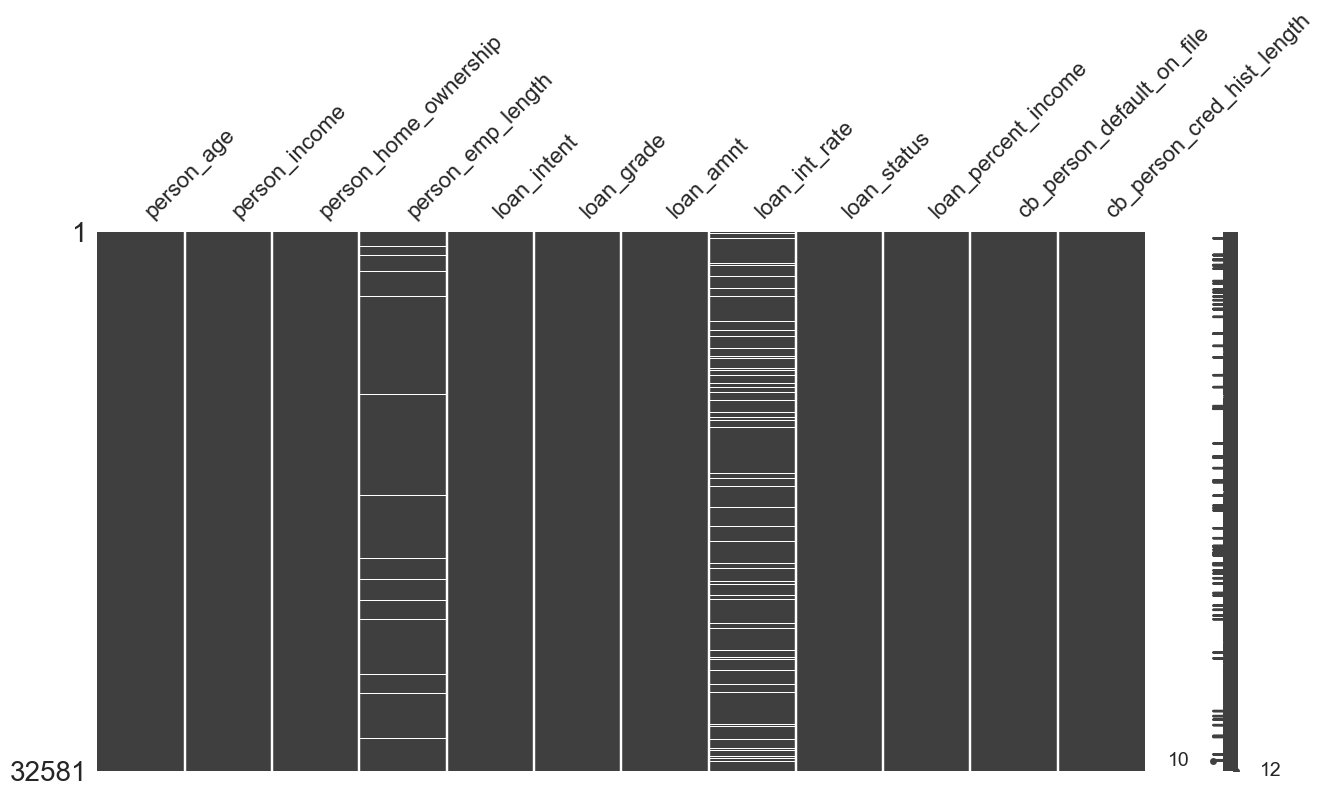

In [89]:
import missingno as msno
msno.matrix(df, figsize = (15,7))

Ta có thể thấy đa phần các thuộc tính đều không bị thiếu dữ liệu chỉ có thuộc tính ```person_emp_length``` và ```loan_int_rate``` bị thiếu dữ liệu. Vì tính chính xác của việc đánh giá tín dụng nên ta sẽ tiến hành loại bỏ các dữ liệu bị thiếu

In [90]:
df.dropna(inplace=True)
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Ta có thể thấy bây giờ dữ liệu đã được loại bỏ các giá trị bị thiếu

Tiếp đến, ta sẽ kiểm tra xem dữ liệu có bị trùng lặp không?

In [91]:
print("Số dữ liệu trùng lặp: {0}".format(df[df.duplicated()].shape[0]))

Số dữ liệu trùng lặp: 137


Ta thấy có 137 dữ liệu bị trùng lặp, ta sẽ tiến hành xóa các dữ liệu trùng lặp này

In [92]:
df.drop_duplicates(inplace=True)
print("Số dữ liệu trùng lặp: {0}".format(df[df.duplicated()].shape[0]))

Số dữ liệu trùng lặp: 0


Bây giờ các dữ liệu trùng lặp đã bị xóa. Tiếp theo, ta cùng xem thông số của các thuộc tính

In [93]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Ta có thể thấy, ở ```person_age``` và ```person_emp_length``` có giá trị ```max``` là ```144``` và ```123``` trong khi giá trị ```mean``` của chúng là ```27``` và ```4```.

Để có cái nhìn rõ hơn ta sẽ sử dụng ```matplotlib``` để vẽ biểu đồ ```box plot``` để xem phân bố của chúng.

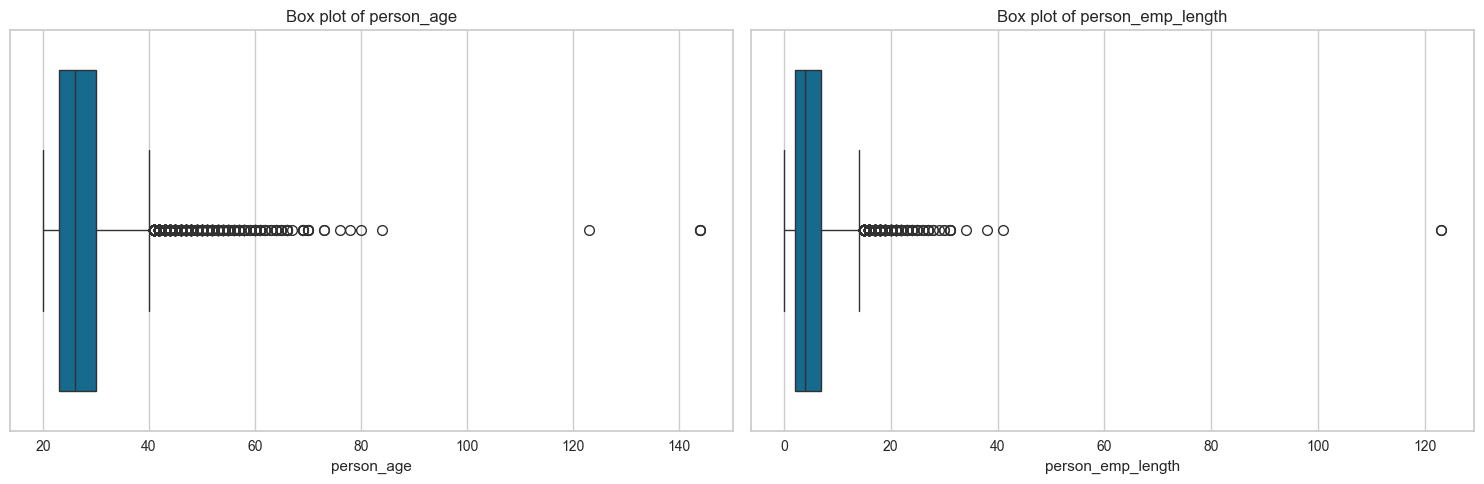

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['person_age'], ax=axs[0])
axs[0].set_title('Box plot of person_age')

sns.boxplot(x=df['person_emp_length'], ax=axs[1])
axs[1].set_title('Box plot of person_emp_length')

plt.tight_layout()
plt.show()

Ta có thể thấy có vài điểm nằm rất xa so với với các dữ liệu còn lại. Ta sẽ tiến hành xóa các điểm ngoại biên này vì chúng có thể ảnh hương đến hiệu suất của mô hình. Ở đây ta cũng có thể thấy rất nhiều điểm nằm ngoài râu của 2 biểu đồ, tuy nhiên ta sẽ không xóa chúng vì ta có thể làm mất thông tin quan trọng liên quan đến nhóm khách hàng lớn tuổi hơn dẫn đến mô hình bị bias, thay vào đó ta sẽ dùng phương pháp chuẩn hóa được trình bày sau đây để giải quyết vấn đề này

In [95]:
# Loại bỏ các giá trị ngoại biên
df = df[(df['person_age'] < 80) & (df['person_emp_length'] < 60)]

In [96]:
raw = df.copy()

## 3.3 Phân tích dữ liệu

Để hiểu rõ hơn về tập dữ liệu, ta sẽ phân tích và trực quan hóa dữ liệu

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

Đầu tiên ta sẽ xem biểu đồ tương quan giữa các đặc trưng của tập dữ liệu. Ta thấy rằng các thuộc tính có độ tương quan khá ổn với nhau. Một số các thuộc tính có độ tương quan khá cao là ```loan_amnt``` và ```loan_percent_income``` điều này cho thấy tỉ lệ giữa khoản vay và thu nhập ảnh hưởng đến số tiền vay

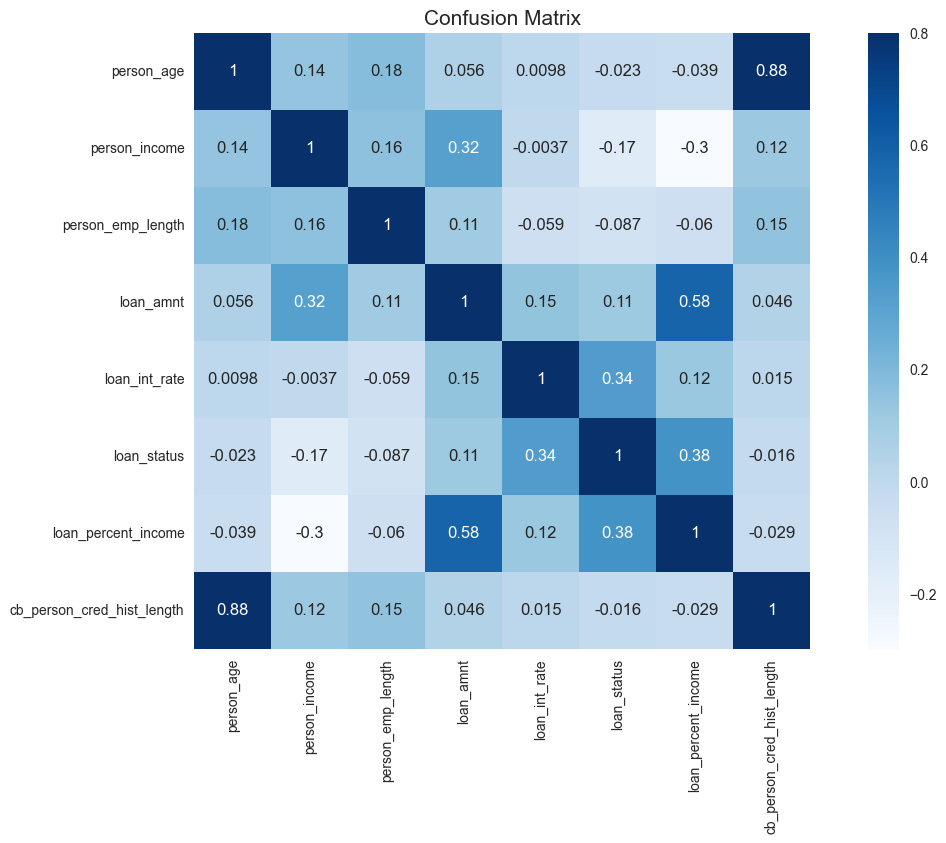

In [98]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
data = df.drop(['loan_intent', 'person_home_ownership', 'cb_person_default_on_file', 'loan_grade'], axis=1)
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion Matrix',fontsize=15);

Tiếp, ta cần xem phân bố trạng thái khoản vay của tập dữ liệu. Tập dữ liệu có 78% là khách hàng sẽ trả nợ, còn lại là không trả nợ

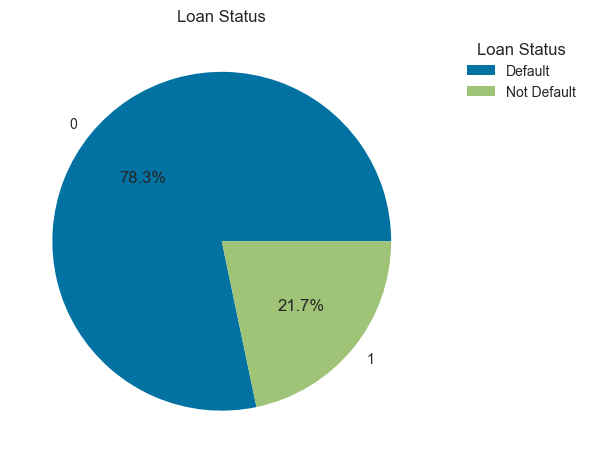

In [99]:
ownership_counts = df['loan_status'].value_counts()
plt.pie(ownership_counts, labels = ownership_counts.index, autopct='%1.1f%%')
plt.title('Loan Status')
plt.legend(["Default", "Not Default"], title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Tiếp đến ta sẽ xem phân bố độ tuổi của người đi vay. Ta có thể thấy trong hình vẽ, số người vay tập trung chủ yếu ở nhóm tuổi từ 25 đến 30 tuổi

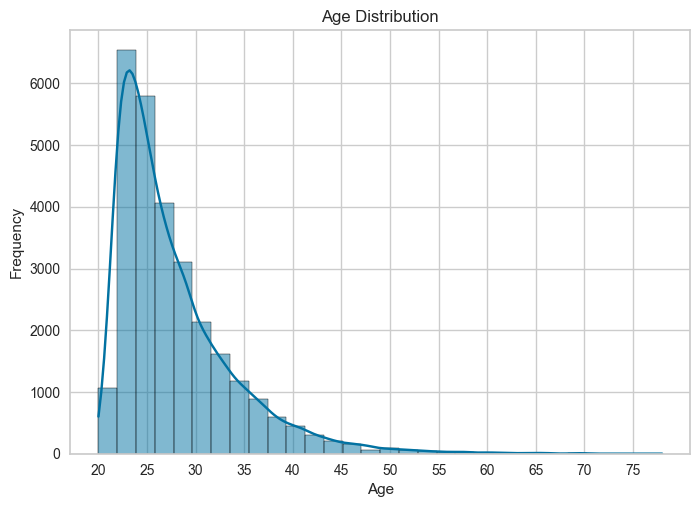

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ histogram
sns.histplot(data=df, x='person_age', bins=30, kde=True)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Đặt chú thích trục x
plt.xticks(range(20, max(df['person_age'])+1, 5))

plt.show()

Tiếp theo, ta sẽ xem tỉ lệ sở hữu nhà ở của người đi vay. Biểu đồ dưới cho ta thấy phần lớn người đi vay đang đi thuê nhà chiếm hơn 50%, phần còn lại là người có nhà thế chấp, chỉ có một lượng nhỏ 7,6% người đi vay sở hữu nhà ở

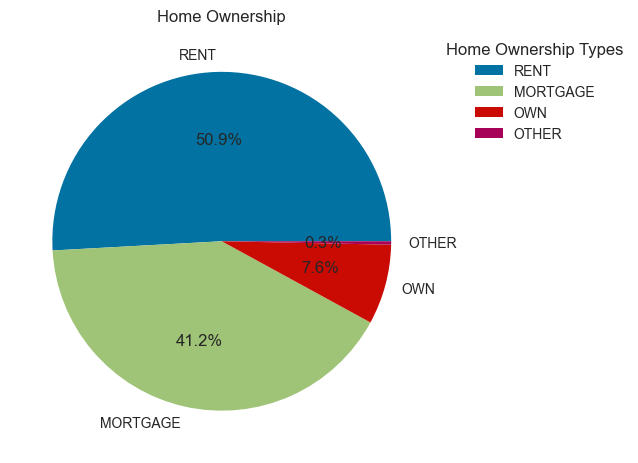

In [101]:
# Tính toán số lượng mỗi loại hình sở hữu nhà
ownership_counts = df['person_home_ownership'].value_counts()

# Vẽ biểu đồ tròn
plt.pie(ownership_counts, labels = ownership_counts.index, autopct='%1.1f%%')

# Đặt tiêu đề cho biểu đồ
plt.title('Home Ownership')

# Thêm chú thích và di chuyển nó ra khỏi biểu đồ
plt.legend(ownership_counts.index, title="Home Ownership Types", bbox_to_anchor=(1,1))

plt.show()

Tiếp đến, ta sẽ xem mục đích vay chủ yếu là gì? Qua biểu đồ ta thấy mục đích vay bao gồm cho Giáo dục, Y tế, Đầu tư, Cá nhân, Trả góp có tỉ lệ khá đồng đều (các cột cao gần bẳng nhau) chỉ có vay sửa chữa nhà là khá thấp so với mục đích còn lại. Vay trả góp là mục đích có tỉ lệ không trả nợ cao nhất, tiếp đến là y tế, sửa chữa nhà. Vay đầu tư có tỉ lệ trả nợ cao nhất.

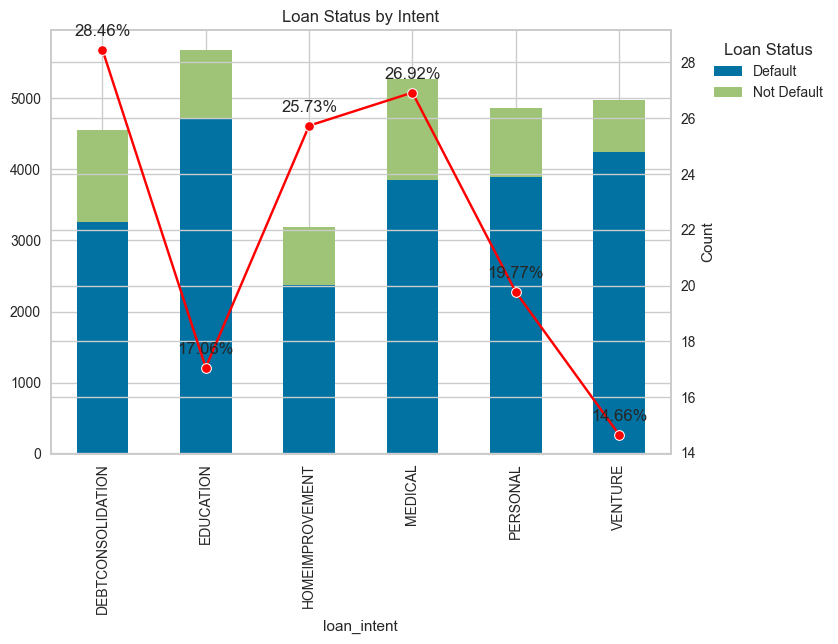

In [102]:
# Tạo bảng tần số chéo
cross_tab = pd.crosstab(df['loan_intent'], df['loan_status'])

# Tính toán phần trăm loan_status = 1
percentage = cross_tab[1] * 100 / cross_tab.sum(axis=1)

# Vẽ biểu đồ cột chồng
ax = cross_tab.plot(kind='bar', stacked=True)

# Vẽ biểu đồ đường thể hiện phần trăm loan_status = 1
ax2 = ax.twinx()
sns.lineplot(data=percentage, color='red', marker='o', ax=ax2)

# Thêm chú thích cho biểu đồ đường
for x, y in zip(range(len(percentage)), percentage):
    label = "{:.2f}%".format(y)  # Thêm % vào chuỗi định dạng
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Loan Status by Intent')
plt.xlabel('Loan Grade')
plt.ylabel('Count')

# Chỉnh sửa chú thích của biểu đồ cột chồng và đặt tiêu đề cho chú thích
ax.legend(["Default", "Not Default"], title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Tiếp theo, ta sẽ xem trạng thái khoản vay so với đánh giá khoản vay. Ta có thể nhìn thấy ở hình bên dưới: đánh giá khoản vay càng cao (xếp từ A-G) thì tỉ lệ khách hàng không trả được nợ càng thấp, điều này thể hiện rõ qua biểu đồ đường màu đỏ về phần trăm người không thể trả được nợ tăng dần khi đánh giá khoản vay thấp xuống

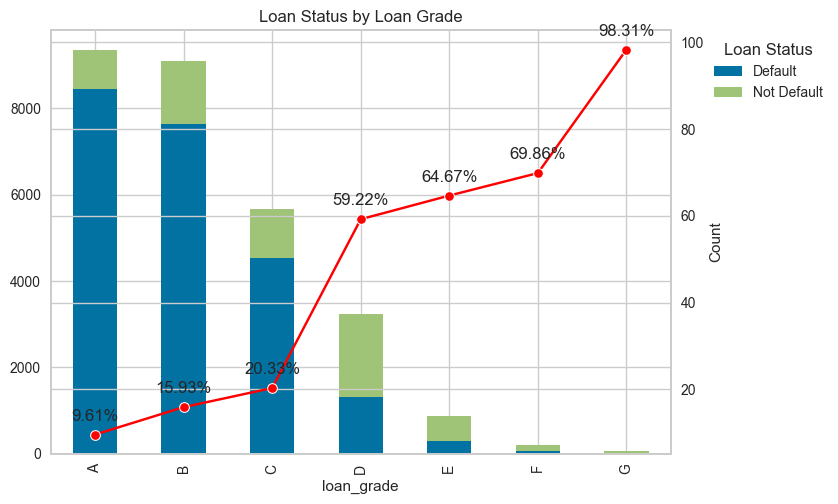

In [103]:
# Tạo bảng tần số chéo
cross_tab = pd.crosstab(df['loan_grade'], df['loan_status'])

# Tính toán phần trăm loan_status = 1
percentage = cross_tab[1] * 100 / cross_tab.sum(axis=1)

# Vẽ biểu đồ cột chồng
ax = cross_tab.plot(kind='bar', stacked=True)

# Vẽ biểu đồ đường thể hiện phần trăm loan_status = 1
ax2 = ax.twinx()
sns.lineplot(data=percentage, color='red', marker='o', ax=ax2)

# Thêm chú thích cho biểu đồ đường
for x, y in zip(range(len(percentage)), percentage):
    label = "{:.2f}%".format(y)  # Thêm % vào chuỗi định dạng
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')

# Chỉnh sửa chú thích của biểu đồ cột chồng và đặt tiêu đề cho chú thích
ax.legend(["Default", "Not Default"], title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Cuối cùng, chúng ta sẽ xem tương quan giữa thu nhập (person_income) và khoản vay (loan_amnt) ảnh hưởng thế nào đến trạng thái khoản vay (loan_status). Ta có thể thấy ở biểu đồ ```Hex plex``` những người có thu nhập thấp dưới 100,000 có xu hướng vay nhiều hơn những người khác và cũng chính những người này ở biểu đồ scatter có số lượng người không thể trả nợ nhiều nhất

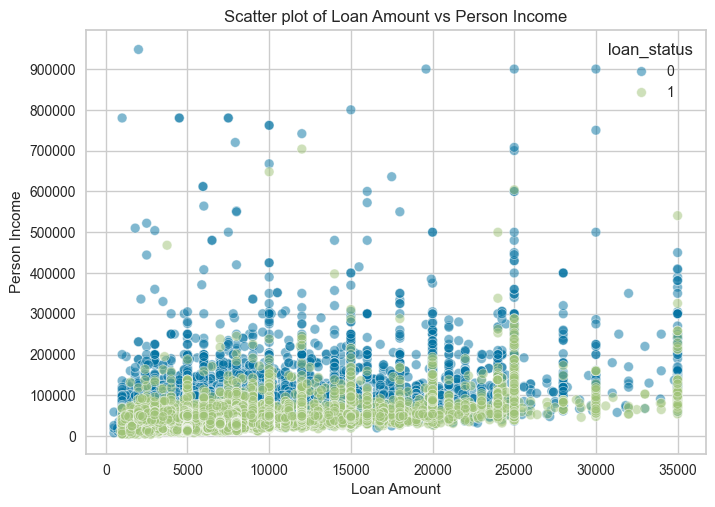

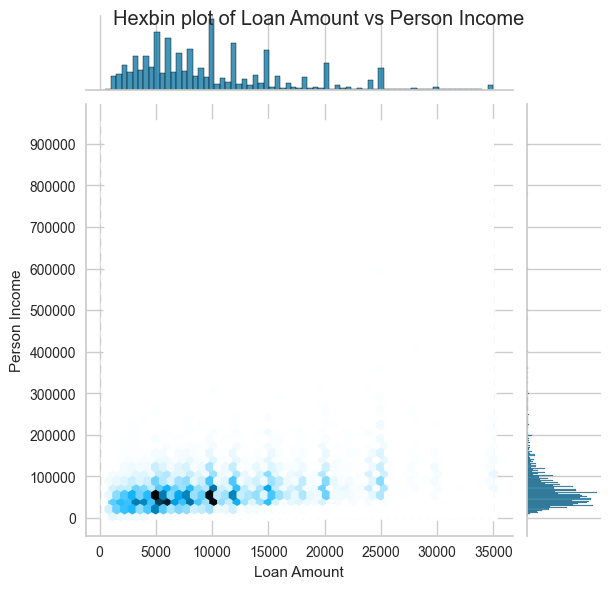

In [104]:
# Lọc dữ liệu
filtered_df = df[df['person_income'] < 1000000]

# Sắp xếp dữ liệu theo loan_status
sorted_df = filtered_df.sort_values(by='loan_status')

fig, ax = plt.subplots()

# Điều chỉnh độ trong suốt của các điểm dữ liệu
sns.scatterplot(x='loan_amnt', y='person_income', hue='loan_status', data=sorted_df, alpha=0.5, ax=ax)

plt.title('Scatter plot of Loan Amount vs Person Income')
plt.xlabel('Loan Amount')
plt.ylabel('Person Income')

# Điều chỉnh trục y
yticks = np.arange(0, sorted_df['person_income'].max(), 100000)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

plt.show()

# Sử dụng biểu đồ hexbin
joint_plot = sns.jointplot(x='loan_amnt', y='person_income', data=sorted_df, kind='hex')

plt.suptitle('Hexbin plot of Loan Amount vs Person Income')
plt.xlabel('Loan Amount')
plt.ylabel('Person Income')

# Điều chỉnh trục y
yticks = np.arange(0, sorted_df['person_income'].max(), 100000)
joint_plot.ax_joint.set_yticks(yticks)
joint_plot.ax_joint.set_yticklabels(yticks)

plt.show()

## 3.4. Chuyển đổi dữ liệu

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28493 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28493 non-null  int64  
 1   person_income               28493 non-null  int64  
 2   person_home_ownership       28493 non-null  object 
 3   person_emp_length           28493 non-null  float64
 4   loan_intent                 28493 non-null  object 
 5   loan_grade                  28493 non-null  object 
 6   loan_amnt                   28493 non-null  int64  
 7   loan_int_rate               28493 non-null  float64
 8   loan_status                 28493 non-null  int64  
 9   loan_percent_income         28493 non-null  float64
 10  cb_person_default_on_file   28493 non-null  object 
 11  cb_person_cred_hist_length  28493 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


Như ta có thể thấy ở trên, tập dữ liệu của chúng ta chứa một số đặc trưng không phải dạng số như ```person_home_ownership```, ```loan_intent``` và ```cb_person_default_on_file ```. Tuy nhiên, mô hình học máy không thể xử lý trực tiếp dữ liệu chuỗi. Chính vì thế, ta cần chuyển đổi dữ liệu dạng chuỗi thành dạng số

Đầu tiên, ta sẽ xem các đặc trưng này có những giá trị nào

In [106]:
object_features = df[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']]
for column in object_features.columns:
    print(f"{column}: {object_features[column].unique()}")
object_features

person_home_ownership: ['OWN' 'MORTGAGE' 'RENT' 'OTHER']
loan_intent: ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
cb_person_default_on_file: ['N' 'Y']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']


,person_home_ownership,loan_intent,cb_person_default_on_file,loan_grade
1,OWN,EDUCATION,N,B
2,MORTGAGE,MEDICAL,N,C
3,RENT,MEDICAL,N,C
4,RENT,MEDICAL,Y,C
5,OWN,VENTURE,N,A
...,...,...,...,...
32576,MORTGAGE,PERSONAL,N,C
32577,MORTGAGE,PERSONAL,N,A
32578,RENT,HOMEIMPROVEMENT,N,B
32579,MORTGAGE,PERSONAL,N,B


Ta có thể thấy ở trên, ```cb_person_default_on_file``` chỉ có hai giá trị là ```Y``` và ```N``` nên ta sẽ sử dụng label encoding: ```Y``` được chuyển đổi thành ```1``` và ```N``` được chuyển đổi thành 0, ```loan_grade``` là đánh giá rủi ro có thứ tự từ A-G được chuyển đổi thành từ 0-5. Còn với ```person_home_ownership``` và ```loan_intent``` là các đặc trưng không có thứ tự ta sẽ sử dụng one-hot encoding để chuyển đổi dữ liệu.

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

In [108]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_colums = ['person_home_ownership', 'loan_intent']
ohe.fit(df[ohe_colums])
merge_ohe_col = np.concatenate((ohe.categories_[0], ohe.categories_[1],))
ohe_data = pd.DataFrame(ohe.transform(df[ohe_colums]).toarray(), columns=merge_ohe_col, index=df.index)
df_new = pd.concat([ohe_data, df], axis=1)
df_new.drop(ohe_colums, axis=1, inplace=True)
df = df_new

## 3.5 Chuẩn hóa dữ liệu

Tập dữ liệu chứa bao gồm các thuộc tính được đo trên các thang đo khác nhau. Sự khác biệt này có thể làm ảnh hưởng đến hiệu suất của mô hình. Để giải quyết vấn đề này, ta sẽ chuẩn hóa các thuộc tính để có cùng một thang đo từ 0 đến 1 bằng phương pháp Min Max Scaler:
$$ x_{scaler} = \frac{x - min(x)}{max(x)-min(x)} $$

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.describe()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000
mean,0.411750,0.003264,0.076299,0.508686,0.159583,0.198926,0.111852,0.184888,0.170428,0.174324,0.133099,0.030666,0.116629,0.205033,0.265433,0.316029,0.217141,0.204243,0.178605,0.135679
std,0.492159,0.057039,0.265481,0.499933,0.366225,0.399199,0.315190,0.388213,0.376015,0.379394,0.106218,0.025305,0.098489,0.195296,0.183418,0.181507,0.412307,0.128170,0.383028,0.144211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051724,0.017428,0.048780,0.000000,0.130435,0.139326,0.000000,0.108434,0.000000,0.035714
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.025539,0.097561,0.166667,0.217391,0.312921,0.000000,0.180723,0.000000,0.071429
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.037332,0.170732,0.333333,0.347826,0.452809,0.000000,0.277108,0.000000,0.214286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Khởi tạo mô hình RFC
clf = RandomForestClassifier()

# Huấn luyện mô hình
clf.fit(X, Y)

# Lấy đặc tính quan trọng
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Bảng tỷ lệ phần trăm đặc tính quan trọng theo thứ tự giảm dần
print(feature_importances_sorted)

loan_percent_income           0.220709
person_income                 0.138121
loan_int_rate                 0.119825
loan_grade                    0.115658
loan_amnt                     0.073373
person_emp_length             0.061418
RENT                          0.052085
person_age                    0.044309
cb_person_cred_hist_length    0.032949
MORTGAGE                      0.027774
DEBTCONSOLIDATION             0.024327
MEDICAL                       0.021304
OWN                           0.016353
HOMEIMPROVEMENT               0.013803
EDUCATION                     0.010284
cb_person_default_on_file     0.009619
PERSONAL                      0.008937
VENTURE                       0.008236
OTHER                         0.000918
dtype: float64


In [111]:
X1 = X.mul(feature_importances_sorted)

In [112]:
X1

,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,MORTGAGE,OTHER,OWN,PERSONAL,RENT,VENTURE,cb_person_cred_hist_length,cb_person_default_on_file,loan_amnt,loan_grade,loan_int_rate,loan_percent_income,person_age,person_emp_length,person_income
0,0.0,0.010284,0.000000,0.000000,0.000000,0.0,0.016353,0.000000,0.000000,0.000000,0.000000,0.000000,0.001063,0.019276,0.038505,0.026591,0.000764,0.007490,0.000380
1,0.0,0.000000,0.000000,0.021304,0.027774,0.0,0.000000,0.000000,0.000000,0.000000,0.001177,0.000000,0.010634,0.038553,0.050151,0.151571,0.003820,0.001498,0.000380
2,0.0,0.000000,0.000000,0.021304,0.000000,0.0,0.000000,0.000000,0.052085,0.000000,0.000000,0.000000,0.073373,0.038553,0.066038,0.140935,0.002292,0.005992,0.004173
3,0.0,0.000000,0.000000,0.021304,0.000000,0.0,0.000000,0.000000,0.052085,0.000000,0.002354,0.009619,0.073373,0.038553,0.059576,0.146253,0.003056,0.011984,0.003419
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.016353,0.000000,0.000000,0.008236,0.000000,0.000000,0.004254,0.000000,0.011579,0.066479,0.000764,0.002996,0.000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28488,0.0,0.000000,0.000000,0.000000,0.027774,0.0,0.000000,0.008937,0.000000,0.000000,0.032949,0.000000,0.011272,0.038553,0.052103,0.029251,0.028266,0.001498,0.003324
28489,0.0,0.000000,0.000000,0.000000,0.027774,0.0,0.000000,0.008937,0.000000,0.000000,0.020005,0.000000,0.036421,0.000000,0.013935,0.039887,0.025974,0.005992,0.007870
28490,0.0,0.000000,0.013803,0.000000,0.000000,0.0,0.000000,0.000000,0.052085,0.000000,0.030596,0.000000,0.073373,0.019276,0.037496,0.122321,0.034377,0.004494,0.004885
28491,0.0,0.000000,0.000000,0.000000,0.027774,0.0,0.000000,0.008937,0.000000,0.000000,0.028242,0.000000,0.030838,0.019276,0.040794,0.026591,0.027502,0.007490,0.009906


Bảng thông số đã cho thấy ta đã chuẩn hóa dữ liệu thành công khi tất cả các thuộc tính đều có ```min=0``` và ```max=1```

## 3.4. Phân chia tập dữ liệu

Để sử dụng cho huấn luyện mô hình học máy, ta sẽ chia tập dữ liệu làm 3 phần: 70% dành cho tập huấn luyện ```train```, 15% tập kiểm thử ```valid``` và 15% tập kiểm tra ```test```

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(X1,Y,test_size=0.3,random_state=12)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
x_train.reset_index(drop=True, inplace = True)
x_test.reset_index(drop=True, inplace = True)
x_valid.reset_index(drop=True, inplace = True)
y_train.reset_index(drop=True, inplace = True)
y_valid.reset_index(drop=True, inplace = True)
y_test.reset_index(drop=True, inplace = True)

print(x_train.shape, x_valid.shape, x_test.shape)

(19945, 19) (4274, 19) (4274, 19)


## 4 Phát triển mô hình

In [114]:
x_train

,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,MORTGAGE,OTHER,OWN,PERSONAL,RENT,VENTURE,cb_person_cred_hist_length,cb_person_default_on_file,loan_amnt,loan_grade,loan_int_rate,loan_percent_income,person_age,person_emp_length,person_income
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.052085,0.008236,0.001177,0.000000,0.020204,0.038553,0.054325,0.101048,0.001528,0.000000,0.001520
1,0.000000,0.010284,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.052085,0.000000,0.001177,0.000000,0.002127,0.000000,0.020666,0.010637,0.003056,0.004494,0.002375
2,0.000000,0.000000,0.013803,0.000000,0.027774,0.0,0.000000,0.0,0.000000,0.000000,0.007061,0.000000,0.022756,0.000000,0.012588,0.031910,0.009931,0.005992,0.006174
3,0.024327,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.052085,0.000000,0.009414,0.000000,0.007444,0.000000,0.000000,0.042546,0.006875,0.019474,0.001422
4,0.000000,0.000000,0.000000,0.021304,0.027774,0.0,0.000000,0.0,0.000000,0.000000,0.008237,0.009619,0.007444,0.057829,0.070885,0.023932,0.010695,0.026964,0.002714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.052085,0.008236,0.000000,0.000000,0.014994,0.000000,0.014069,0.029251,0.001528,0.005992,0.004478
19941,0.000000,0.000000,0.000000,0.000000,0.027774,0.0,0.000000,0.0,0.000000,0.008236,0.004707,0.009619,0.014887,0.038553,0.045776,0.037228,0.005348,0.011984,0.003460
19942,0.024327,0.000000,0.000000,0.000000,0.027774,0.0,0.000000,0.0,0.000000,0.000000,0.015298,0.000000,0.008507,0.057829,0.068664,0.039887,0.018335,0.010486,0.001764
19943,0.000000,0.010284,0.000000,0.000000,0.000000,0.0,0.016353,0.0,0.000000,0.000000,0.002354,0.000000,0.009570,0.000000,0.012588,0.026591,0.001528,0.004494,0.003121


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [116]:
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 

In [117]:
clf = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [118]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity



In [119]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, x_train,y_train, x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    

For  KN
Accuracy -  0.9075807206364062
Precision -  0.8658008658008658
Recall -  0.6651884700665188
Specificity -  0.9724199288256228

For  xgb
Accuracy -  0.9358914365933552
Precision -  0.9511494252873564
Recall -  0.7339246119733924
Specificity -  0.9899169632265717

For  cat
Accuracy -  0.939167056621432
Precision -  0.9692982456140351
Recall -  0.7350332594235033
Specificity -  0.9937722419928826

[LightGBM] [Info] Number of positive: 4329, number of negative: 15616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 19945, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217047 -> initscore=-1.282959
[LightGBM] [Info] Start training from score -1.282959
For  lgb
Accuracy -  0.938465138043986

## 5.Hyperparameter Tuning

In [133]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             x_valid, y_valid, scoring='recall', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 860, number of negative: 2986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 3846, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223609 -> initscore=-1.244758
[LightGBM] [Info] Start training from score -1.244758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [134]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'colsample_bytree': 0.814656796200617,
 'learning_rate': 0.24863774251608667,
 'max_depth': 4,
 'min_child_weight': 0.056084256445117796,
 'num_leaves': 10,
 'subsample': 0.9159918551875864}

In [135]:
# Thiết lập các tham số cho mô hình LGBMClassifier
params = params_lgbm

# Khởi tạo mô hình LGBMClassifier với các tham số đã thiết lập
lgb = LGBMClassifier(**params)

current_accuracy,current_precision, current_recall, current_specificity = train_classifier(lgb, x_train, y_train, x_test, y_test)

print("For lgb")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Info] Number of positive: 4329, number of negative: 15616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 19945, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217047 -> initscore=-1.282959
[LightGBM] [Info] Start training from score -1.282959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## 6.Training Final Model

In [136]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, x_train, y_train, x_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Info] Number of positive: 4329, number of negative: 15616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 19945, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217047 -> initscore=-1.282959
[LightGBM] [Info] Start training from score -1.282959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## 7.Auto ML using PyCaret

In [124]:
from pycaret.classification import *

In [125]:
raw.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [126]:
model = setup(data = raw, target = 'loan_status', session_id=123) 

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28493, 12)"
4,Transformed data shape,"(28493, 26)"
5,Transformed train set shape,"(19945, 26)"
6,Transformed test set shape,"(8548, 26)"
7,Numeric features,7
8,Categorical features,4
9,Preprocess,True


In [127]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:57:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9365,0.9426,0.7264,0.9750,0.8321,0.7940,0.8073,5.5030
lightgbm,Light Gradient Boosting Machine,0.9357,0.9427,0.7252,0.9718,0.8303,0.7917,0.8048,0.2580
xgboost,Extreme Gradient Boosting,0.9337,0.9453,0.7340,0.9492,0.8275,0.7873,0.7975,0.2230
rf,Random Forest Classifier,0.9331,0.9281,0.7137,0.9709,0.8222,0.7822,0.7966,0.4470
gbc,Gradient Boosting Classifier,0.9279,0.9257,0.7017,0.9542,0.8084,0.7653,0.7792,0.4500
et,Extra Trees Classifier,0.9206,0.9127,0.6828,0.9339,0.7885,0.7411,0.7551,0.3910
dt,Decision Tree Classifier,0.8850,0.8399,0.7603,0.7246,0.7416,0.6677,0.6684,0.0680
ada,Ada Boost Classifier,0.8848,0.8966,0.6393,0.7907,0.7065,0.6359,0.6418,0.2160
lda,Linear Discriminant Analysis,0.8640,0.8661,0.5890,0.7331,0.6528,0.5695,0.5751,0.0620
ridge,Ridge Classifier,0.8601,0.8662,0.5172,0.7621,0.6158,0.5341,0.5494,0.0650


In [128]:
data_original =  pd.read_csv("credit_risk_dataset.csv") 

In [129]:
model = setup(data = data_original, target = 'loan_status', session_id=123) 

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Numeric features,7
8,Categorical features,4
9,Rows with missing values,12.1%


In [131]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:02:22
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9356,0.9441,0.7240,0.9741,0.8306,0.7919,0.8052,6.2630
lightgbm,Light Gradient Boosting Machine,0.9350,0.9458,0.7230,0.9716,0.8291,0.7900,0.8032,0.2870
xgboost,Extreme Gradient Boosting,0.9335,0.9456,0.7343,0.9496,0.8280,0.7876,0.7977,0.2380
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,0.4720
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,0.7220
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,0.5030
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.1180
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,0.2690
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.0730
ridge,Ridge Classifier,0.8571,0.8658,0.5031,0.7609,0.6056,0.5227,0.5395,0.0860


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9388,0.9483,0.7403,0.9729,0.8408,0.8038,0.8153


In [ ]:
# save pipeline
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_emp_length', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=n...
                                     include=['person_home_ownership',
                      